# Topic Modelling

In [201]:
# Import modules
# https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/
import re
import numpy as np
import pandas as pd
from pprint import pprint

import os

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# NLTK
import nltk

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

## Topic Modelling the Epiricist's Epistemic Works

In [202]:
# Set path to the file with novels
path = "./Clean1"

# Empty variable for corpus
DECorpus=[]

# Go to the directory with all the text files
for filename in os.listdir(path):
        
    # Open each file and add all the content 
    with open(path + '/' + filename, "r", encoding="utf8") as file:
         fileContent = file.read()

# Add the content of the file
    DEcorpus.append(fileContent)

len(DEcorpus)

21

with open("Locke_HumanUnderstandingCLEAN.txt", "r", encoding="utf-8") as file:
    Locke = file.read()

with open("Berkeley_HumanKnowledgeCLEAN.txt", "r", encoding="utf-8") as file:
    Berkeley = file.read()
    
with open("Hume_HumanUnderstandingCLEAN.txt", "r", encoding="utf-8") as file:
    Hume = file.read()
    
DEcorpus = [Locke, Berkeley, Hume]

In [203]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['ibid','would','may',' can',' not','say','much','way','yet','must','never','ever','seem'])

In [204]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(DEcorpus))

print(data_words[:1])

[['two', 'treatises', 'of', 'government', 'in', 'the', 'former', 'the', 'false', 'principles', 'and', 'foundation', 'of', 'sir', 'robert', 'filmer', 'and', 'his', 'followers', 'are', 'detected', 'and', 'overthrown', 'the', 'latter', 'is', 'an', 'essay', 'concerning', 'the', 'original', 'extent', 'and', 'end', 'of', 'civil', 'government', 'john', 'locke', 'the', 'preface', 'reader', 'thou', 'hast', 'here', 'the', 'beginning', 'and', 'end', 'of', 'discourse', 'concerning', 'government', 'what', 'fate', 'has', 'otherwise', 'disposed', 'of', 'the', 'papers', 'that', 'should', 'have', 'filled', 'up', 'the', 'middle', 'and', 'were', 'more', 'than', 'all', 'the', 'rest', 'it', 'is', 'not', 'worth', 'while', 'to', 'tell', 'thee', 'these', 'which', 'remain', 'hope', 'are', 'sufficient', 'to', 'establish', 'the', 'throne', 'of', 'our', 'great', 'restorer', 'our', 'present', 'king', 'william', 'to', 'make', 'good', 'his', 'title', 'in', 'else', 'consent', 'of', 'the', 'people', 'which', 'being', 

In [205]:
# Build the bigram and trigram models
#bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
#trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['two', 'treatises', 'of', 'government', 'in', 'the', 'former', 'the', 'false', 'principles', 'and', 'foundation', 'of', 'sir', 'robert', 'filmer', 'and', 'his', 'followers', 'are', 'detected', 'and', 'overthrown', 'the', 'latter', 'is', 'an', 'essay', 'concerning', 'the', 'original', 'extent', 'and', 'end', 'of', 'civil', 'government', 'john', 'locke', 'the', 'preface', 'reader', 'thou', 'hast', 'here', 'the', 'beginning', 'and', 'end', 'of', 'discourse', 'concerning', 'government', 'what', 'fate', 'has', 'otherwise', 'disposed', 'of', 'the', 'papers', 'that', 'should', 'have', 'filled', 'up', 'the', 'middle', 'and', 'were', 'more', 'than', 'all', 'the', 'rest', 'it', 'is', 'not', 'worth', 'while', 'to', 'tell', 'thee', 'these', 'which', 'remain', 'hope', 'are', 'sufficient', 'to', 'establish', 'the', 'throne', 'of', 'our', 'great', 'restorer', 'our', 'present', 'king', 'william', 'to', 'make', 'good', 'his', 'title', 'in', 'else', 'consent', 'of', 'the', 'people', 'which', 'being', '

In [206]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [207]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:5])

[['treatise', 'government', 'former', 'false', 'principle', 'foundation', 'sir', 'robert', 'filmer', 'follower', 'detect', 'overthrow', 'latter', 'essay', 'concern', 'original', 'extent', 'end', 'civil', 'government', 'john', 'locke', 'preface', 'reader', 'thou', 'hast', 'begin', 'end', 'discourse', 'concern', 'government', 'fate', 'otherwise', 'dispose', 'paper', 'fill', 'middle', 'rest', 'worth', 'tell', 'remain', 'hope', 'sufficient', 'establish', 'throne', 'great', 'restorer', 'present', 'king', 'william', 'make', 'good', 'title', 'else', 'consent', 'people', 'lawful', 'government', 'fully', 'clearly', 'prince', 'christendom', 'justify', 'world', 'people', 'england', 'whose', 'love', 'natural', 'right', 'resolution', 'preserve', 'save', 'nation', 'war', 'brink', 'slavery', 'ruin', 'paper', 'evidence', 'flatter', 'find', 'great', 'miss', 'lose', 'reader', 'satisfied', 'imagine', 'shall', 'time', 'inclination', 'repeat', 'pain', 'fill', 'want', 'part', 'answer', 'trace', 'sir', 'robe

In [208]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:5])

[[(0, 6), (1, 1), (2, 4), (3, 1), (4, 12), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 3), (11, 2), (12, 1), (13, 34), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 38), (20, 1), (21, 1), (22, 4), (23, 1), (24, 1), (25, 158), (26, 7), (27, 2), (28, 1), (29, 7), (30, 2), (31, 3), (32, 7), (33, 1), (34, 3), (35, 1), (36, 2), (37, 1), (38, 1), (39, 1), (40, 3), (41, 1), (42, 1), (43, 1), (44, 2), (45, 34), (46, 8), (47, 27), (48, 4), (49, 3), (50, 1), (51, 3), (52, 8), (53, 1), (54, 1), (55, 1), (56, 6), (57, 2), (58, 1), (59, 5), (60, 1), (61, 12), (62, 2), (63, 1), (64, 10), (65, 84), (66, 3), (67, 35), (68, 7), (69, 22), (70, 1), (71, 394), (72, 7), (73, 10), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 4), (80, 6), (81, 1), (82, 5), (83, 7), (84, 1), (85, 1), (86, 1), (87, 4), (88, 20), (89, 1), (90, 1), (91, 1), (92, 4), (93, 1), (94, 1), (95, 1), (96, 2), (97, 2), (98, 7), (99, 1), (100, 6), (101, 8), (102, 2), (103, 1), (104, 10), (105, 1), (106, 1), (107, 1), (108, 1), (

In [209]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [210]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.008*"great" + 0.008*"man" + 0.005*"government" + 0.004*"make" + '
  '0.004*"people" + 0.004*"time" + 0.004*"even" + 0.003*"find" + 0.003*"give" '
  '+ 0.003*"state"'),
 (1,
  '0.003*"idea" + 0.002*"man" + 0.002*"mind" + 0.002*"find" + 0.002*"object" + '
  '0.002*"not" + 0.002*"power" + 0.002*"make" + 0.002*"thing" + '
  '0.002*"reason"'),
 (2,
  '0.005*"idea" + 0.003*"man" + 0.002*"make" + 0.002*"thing" + 0.002*"not" + '
  '0.001*"mind" + 0.001*"think" + 0.001*"part" + 0.001*"use" + 0.001*"find"'),
 (3,
  '0.003*"idea" + 0.002*"man" + 0.001*"make" + 0.001*"think" + 0.001*"thing" + '
  '0.001*"mind" + 0.001*"great" + 0.001*"not" + 0.001*"power" + '
  '0.001*"reason"'),
 (4,
  '0.002*"idea" + 0.002*"man" + 0.002*"mind" + 0.002*"make" + 0.002*"not" + '
  '0.001*"thing" + 0.001*"great" + 0.001*"use" + 0.001*"part" + 0.001*"power"'),
 (5,
  '0.025*"idea" + 0.016*"thing" + 0.015*"mind" + 0.011*"perceive" + '
  '0.009*"exist" + 0.008*"sense" + 0.008*"object" + 0.008*"think" + '
  '0

In [211]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.4533028901778415

Coherence Score:  0.3250149223805533


In [212]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
18     28.871799        1       1  0.175575  0.042937
0      24.743286        1       2  0.047659 -0.102654
19     14.367923        1       3  0.141796 -0.188146
9      13.455488        1       4  0.122379 -0.026136
13      5.251915        1       5  0.169630  0.000260
7       4.944628        1       6  0.201464  0.107378
5       4.302035        1       7  0.192155  0.091790
10      4.055080        1       8  0.157426 -0.003143
14      0.007371        1       9 -0.040919 -0.051922
17      0.000045        1      10 -0.081835  0.039943
8       0.000045        1      11 -0.054251  0.014715
1       0.000044        1      12 -0.091363  0.019940
6       0.000044        1      13 -0.062030 -0.010255
16      0.000043        1      14 -0.128189  0.001649
4       0.000043        1      15 -0.133753  0.021176
15      0.000043        1      16 -0.103098 -0.018219
2       0.000043        1      17 -0.123372  0.022090
12      0.000043        1      18 -0.083097  0.019020
3       0.000042        1      19 -0.152713  0.018365
11      0.000042        1      20 -0.153463  0.001211, topic_info=     Category          Freq        Term         Total  loglift  logprob
term                                                                   
1848  Default  10738.000000        idea  10738.000000  30.0000  30.0000
2321  Default  10083.000000         man  10083.000000  29.0000  29.0000
2313  Default   7209.000000        make   7209.000000  28.0000  28.0000
2534  Default   5956.000000         not   5956.000000  27.0000  27.0000
2397  Default   5206.000000        mind   5206.000000  26.0000  26.0000
2892  Default   4555.000000       power   4555.000000  25.0000  25.0000
3830  Default   5512.000000       thing   5512.000000  24.0000  24.0000
1681  Default   4576.000000       great   4576.000000  23.0000  23.0000
3831  Default   4821.000000       think   4821.000000  22.0000  22.0000
2703  Default   3599.000000        part   3599.000000  21.0000  21.0000
1646  Default   3405.000000        give   3405.000000  20.0000  20.0000
2472  Default   2549.000000        name   2549.000000  19.0000  19.0000
2151  Default   3624.000000        know   3624.000000  18.0000  18.0000
3125  Default   3503.000000      reason   3503.000000  17.0000  17.0000
4040  Default   2921.000000         use   2921.000000  16.0000  16.0000
1502  Default   3249.000000        find   3249.000000  15.0000  15.0000
3287  Default   2630.000000       right   2630.000000  14.0000  14.0000
4243  Default   2786.000000        word   2786.000000  13.0000  13.0000
1665  Default   2262.000000  government   2262.000000  12.0000  12.0000
2482  Default   3454.000000      nature   3454.000000  11.0000  11.0000
1658  Default   3093.000000        good   3093.000000  10.0000  10.0000
2153  Default   2263.000000   knowledge   2263.000000   9.0000   9.0000
2754  Default   2348.000000      people   2348.000000   8.0000   8.0000
501   Default   2879.000000         can   2879.000000   7.0000   7.0000
3858  Default   2583.000000        time   2583.000000   6.0000   6.0000
3762  Default   2672.000000        take   2672.000000   5.0000   5.0000
425   Default   2726.000000        body   2726.000000   4.0000   4.0000
1507  Default   2383.000000       first   2383.000000   3.0000   3.0000
2175  Default   2476.000000         law   2476.000000   2.0000   2.0000
3402  Default   2905.000000         see   2905.000000   1.0000   1.0000
...       ...           ...         ...           ...      ...      ...
1646  Topic20      0.000345        give   3405.680176  -1.4167  -6.9357
2534  Topic20      0.000429         not   5956.609863  -1.7570  -6.7170
1848  Topic20      0.000543        idea  10738.387695  -2.1096  -6.4802
1665  Topic20      0.000279  government   2262.592041  -1.2189  -7.1469
3287  Topic20      0.000296       right   2630.380615  -1.3117  -7.0891
2754  Topic20      0.000279      

## Using MALLET to Enhance Topic Model

In [213]:
os.environ.update({'MALLET_HOME':r'C:/newMallet/mallet-2.0.8/'})
mallet_path = 'C:/newMallet/mallet-2.0.8/bin/mallet' 
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [214]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(1,
  [('government', 0.015284128020901372),
   ('people', 0.013803614195514914),
   ('hume', 0.013564119311996517),
   ('essay', 0.013346396690616154),
   ('edition', 0.012910951447855432),
   ('lib', 0.012192466797300239),
   ('power', 0.011604615719573264),
   ('time', 0.010929675593294143),
   ('state', 0.010886131069018071),
   ('party', 0.01027650772915306)]),
 (2,
  [('great', 0.02903126179609485),
   ('sentiment', 0.017707010740880547),
   ('human', 0.01708932431968704),
   ('passion', 0.014241103599739199),
   ('age', 0.012250780687004564),
   ('kind', 0.01173604200267664),
   ('observe', 0.011667410178099585),
   ('regard', 0.01080951237088638),
   ('character', 0.010740880546309324),
   ('learn', 0.009471191791633781)]),
 (14,
  [('idea', 0.04770861833105335),
   ('motion', 0.019852941176470587),
   ('mind', 0.016945964432284542),
   ('general', 0.016689466484268126),
   ('man', 0.014808481532147743),
   ('thing', 0.014227086183310533),
   ('part', 0.01420998632010944),
   

In [215]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [216]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

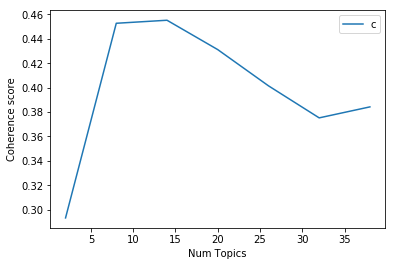

In [217]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [218]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2932
Num Topics = 8  has Coherence Value of 0.4527
Num Topics = 14  has Coherence Value of 0.4552
Num Topics = 20  has Coherence Value of 0.4312
Num Topics = 26  has Coherence Value of 0.4015
Num Topics = 32  has Coherence Value of 0.3752
Num Topics = 38  has Coherence Value of 0.3842


In [219]:
# Select the model and print the topics
optimal_model = model_list[6]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(14,
  '0.024*"common" + 0.018*"war" + 0.018*"liberty" + 0.017*"free" + '
  '0.016*"possession" + 0.016*"obedience" + 0.014*"monarchy" + 0.013*"land" + '
  '0.013*"thing" + 0.013*"brother"'),
 (6,
  '0.049*"idea" + 0.042*"thing" + 0.041*"exist" + 0.038*"mind" + '
  '0.034*"perceive" + 0.029*"sense" + 0.026*"existence" + 0.024*"substance" + '
  '0.017*"quality" + 0.017*"spirit"'),
 (22,
  '0.077*"idea" + 0.049*"thing" + 0.040*"man" + 0.039*"make" + 0.023*"mind" + '
  '0.019*"part" + 0.013*"colour" + 0.013*"nature" + 0.013*"true" + '
  '0.013*"great"'),
 (16,
  '0.057*"distinct" + 0.030*"happiness" + 0.023*"capable" + 0.023*"pleasure" + '
  '0.020*"collection" + 0.019*"identity" + 0.016*"frame" + 0.015*"settle" + '
  '0.015*"constitution" + 0.014*"prove"'),
 (28,
  '0.021*"argument" + 0.021*"principle" + 0.021*"system" + 0.019*"world" + '
  '0.017*"order" + 0.016*"life" + 0.015*"reason" + 0.014*"animal" + '
  '0.014*"nature" + 0.014*"subject"'),
 (15,
  '0.064*"idea" + 0.034*"word" + 0.

In [237]:
import gensim
model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(optimal_model)

In [238]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, corpus, id2word)
vis

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
37     11.562459        1       1  0.000029  0.000036
22      8.731049        1       2  0.000006  0.000238
5       8.482480        1       3  0.000157  0.000055
20      8.015100        1       4  0.000116  0.000096
15      5.201256        1       5  0.000128 -0.000237
33      5.187648        1       6 -0.000165 -0.000746
6       4.853632        1       7  0.000230 -0.000008
29      3.671025        1       8 -0.000589 -0.000491
19      3.028185        1       9  0.000394  0.000072
9       2.920950        1      10 -0.000323 -0.000259
36      2.686615        1      11 -0.000241 -0.000332
11      2.638332        1      12  0.000092 -0.000061
10      2.568673        1      13  0.000200  0.000421
26      2.494337        1      14 -0.000601  0.000394
7       2.445595        1      15 -0.000242  0.000335
14      2.254431        1      16 -0.000170  0.000303
25      2.142511        1      17 -0.000024  0.000118
17      2.044624        1      18 -0.000140 -0.000315
12      2.002717        1      19  0.000384  0.000193
34      1.671505        1      20  0.000273  0.000055
3       1.336180        1      21 -0.000110  0.000456
2       1.259213        1      22  0.000100  0.000621
23      1.229998        1      23 -0.000422 -0.000332
8       1.179792        1      24  0.000023  0.000132
31      1.094468        1      25  0.000364 -0.000190
30      0.987870        1      26 -0.000624  0.000317
28      0.946094        1      27  0.000085  0.000040
24      0.937402        1      28  0.000396 -0.000423
32      0.881544        1      29  0.000392 -0.000271
13      0.836412        1      30  0.000513  0.000095
35      0.724464        1      31  0.000099 -0.000177
4       0.690734        1      32 -0.000184  0.000060
16      0.686070        1      33  0.000053 -0.000145
1       0.657300        1      34  0.000220  0.000287
27      0.508742        1      35  0.000274 -0.000330
21      0.505813        1      36 -0.000042 -0.000128
18      0.479444        1      37 -0.000299 -0.000033
0       0.455335        1      38 -0.000351  0.000152, topic_info=      Category       Freq             Term      Total  loglift  logprob
term                                                                   
7433   Default  43.000000       undisputed  43.000000  30.0000  30.0000
9995   Default  47.000000           colley  47.000000  29.0000  29.0000
11473  Default  46.000000      guicciardin  46.000000  28.0000  28.0000
15844  Default  43.000000        changesit  43.000000  27.0000  27.0000
106    Default  45.000000           afield  45.000000  26.0000  26.0000
14293  Default  45.000000           stadia  45.000000  25.0000  25.0000
15847  Default  43.000000          cleanth  43.000000  24.0000  24.0000
4685   Default  44.000000           casual  44.000000  23.0000  23.0000
15061  Default  45.000000         virgilsk  45.000000  22.0000  22.0000
9298   Default  46.000000            array  46.000000  21.0000  21.0000
14012  Default  44.000000           scipio  44.000000  20.0000  20.0000
15550  Default  46.000000          laelium  46.000000  19.0000  19.0000
9114   Default  44.000000            amnem  44.000000  18.0000  18.0000
2947   Default  45.000000          prevent  45.000000  17.0000  17.0000
17687  Default  44.000000          glorify  44.000000  16.0000  16.0000
4239   Default  43.000000        wonderful  43.000000  15.0000  15.0000
17205  Default  44.000000       beweeginge  44.000000  14.0000  14.0000
14021  Default  45.000000        scoundrel  45.000000  13.0000  13.0000
12474  Default  46.000000           medici  46.000000  12.0000  12.0000
6999   Default  44.000000          sillier  44.000000  11.0000  11.0000
6372   Default  44.000000     outrageously  44.000000  10.0000  10.0000
7164   Default  45.000000            stuff  45.000000   9.0000   9.0000
3922   Default  45.000000              try  45.000000   8.0000   8.00

In [ ]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=DEcorpus):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=DEcorpus)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

In [ ]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics